---
# Übungszettel 3, Python Aufgabe
---

**ausgegeben am Mi 6.5.2020 12 Uhr, abzugeben bis Mi 13.5.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: 

Übungsgruppe: Laura Strampe

---

**Einführung**: In *Aufgabe 2.3 Ablenkung bewegter Ladungen im Plattenkondensator* wurde der Durchflug eines Elektrons durch das elektrische Feld eines idealen Platten-Kondensators der Länge $l=0.1$m analytisch berechnet.

Wir wollen diesen Fall hier noch einmal aufgreifen und zeigen wie für einen etwas realistischeren Fall die Bewegungsgleichungen numerisch gelöst werden können. Dies soll als Möglichkeit dienen die Funktion `scipy.integrate.solve_ivp()` kennen zu lernen.

Hierzu betrachte man zunächst die Bewegungsgleichung:

$$m \cdot \frac{\textrm{d}^2 \vec{r}(t)}{\textrm{d}t^2} = \vec{F}\left( \vec{r} \right)$$

Also Masse des Elektrons $m$ mal zweite zeitliche Ableitung des Elektronen-Ortes nach der Zeit (Beschleunigung) $\frac{\textrm{d}^2 \vec{r}}{\textrm{d}t^2}$ ist gleich der Kraft $\vec{F}\left( \vec{r} \right)$, wobei $\vec{F}\left( \vec{r} \right)$ hier explizit vom Ort des Elektrons $\vec{r}$ abhängt.

Wir schreiben diese Differentialgleichung in zwei Gleichungen erster Ordnung mit Hilfe der Geschwindigkeit $\vec{v}(t)$ um:

$$\frac{\textrm{d} \vec{r}(t)}{\textrm{d}t} = \vec{v}(t)$$
$$\frac{\textrm{d} \vec{v}(t)}{\textrm{d}t} = \frac{\vec{F}\left( \vec{r} \right)}{m}$$

Im letzten Semester haben Sie Gleichungen dieser Art mit Euler Integration gelöst. Hier lassen wir diese von der Bücherrei-Funktion `scipy.integrate.solve_ivp()` automatisch lösen.

**Aufgabe**: Lösen Sie die Bewegungsgleichungen eines Elektrons mit Anfangsgeschwindigkeit $v_{x,0} = \sqrt{\frac{2e\Delta U}{m}}$ und $\Delta U = 5.11$ kV mittig durch das unten angegebene Feld eines nicht-idealen Plattenkondensators mit Hilfe von `scipy.integrate.solve_ivp`. Plotten Sie den Pfad der Elektronen in einen Plot der Äquipotential-Linien des Plattenkondensators. Plotten Sie die Komponenten der Energie (kinetische Energie und Energie im Feld) des Elektrons als Funktion der Zeit. Was passiert energetisch beim Austritt aus dem Feld des Kondensators?

**Vorgehensweise**: Folgende Schritte stellen eine der einfachsten Lösungen dar, Sie müssen jedoch nicht diesen Weg gehen, um die Aufgabe erfolgreich zu bearbeiten:

1. Definieren Sie eine Funktion `f(t,x)` (*Achtung: genau so, wie das hier steht*) die mit gegebenem `x` die rechte Seite der beiden Gleichungen erster Ordnung berechnet und als `numpy.array` oder Liste zurückgibt. `x` ist dabei auch ein `numpy.array` oder eine Liste mit den Einträgen $r_x, r_z, v_x, v_z$ (in der Reihenfolge). `t` ist die Zeit. Die Rückgabe der Funktion ist damit ein Vektor der ersten zeitlichen Ableitungen des Eingabevektors. Um $\frac{\vec{F}\left( \vec{r} \right)}{m}$ zu berechnen importieren Sie die benötigten Konstanten (`electron_mass`,`elementary_charge`  aus `scipy.constants`). Beachten Sie das Vorzeichen der Ladung und berechnen Sie die elektrostatische Kraft mit Hilfe des weiter unten angegebenen, genäherten Feldes.

2. Definieren Sie Anfangsbedingungen `x0` mit $r_{x,0}= -0.2, r_{z,0}=0,v_{z,0}=0$ sowie $v_{x,0} = \sqrt{\frac{2e\Delta U}{m}}$ (alle Angaben in Meter) mit $\Delta U = 5.11$ kV.

3. Lassen Sie Python die Flugzeit `t_end` berechnen, die Elektronen mit der gegebenen Anfangsgeschwindigkeit benötigen um $x=0.2$m von ihrem Anfangsorts ohne den Kondensator aus zu erreichen.

3. Importieren Sie `solve_ivp` aus `scipy.integrate`. `scipy.integrate` benötigt mindestens 3 Argumente: die Funktion `f` aus *1.*, die die ersten Ableitungen berechnet (*Achtung: wirklich `f` übergeben, nicht `f(t,x)` oder `f()`*), die Zeitspanne, über die integriert werden soll (hier: `[0,t_end]` mit `t_end` aus *3.*) und den Vektor der Anfangswerte `x0` aus *2.*. Das Ergebnis der Funktions-Ausführung nennen wir `sol` (kurz für *solution* ).

4. `sol` besitzt mehrere Komponenten. Unter anderem:

    `sol.t` sind die Zeiten, zu denen die Orte (und Geschwindigkeiten) berechnet wurden. Man beachte, dass `solve_ivp` fehlerabschätzende Algorithmen mit variabler Schrittweite nutzt und `sol.t` daher im Allgemeinen oft unregelmäßig aussieht.
    
    `sol.y` sind die Werte $r_x, r_z, v_x, v_z$ zu den Zeitpunkten `sol.t`. $r_x$ ist z.B. `sol.y[0]`
    
    Plotten Sie den Pfad der Elektronen in einen Plot der Äquipotential-Linien des Plattenkondensators.

5. Plotten Sie die Komponenten der Energie (kinetische Energie und Energie im Feld) des Elektrons als Funktion der Zeit. Achten Sie dabei auf das Vorzeichen der Ladung. Was passiert energetisch beim Austritt aus dem Feld des Kondensators?

**Hilfestellung**: Nutzen Sie das genäherte elektrostatische Potential `phi(x,z)` eines in eine Elektronenoptik eingebauten Plattenkondensators, wie angegeben, sowie das elektrische Feld `E(x,z)` (per finite Differenzen berechnet hier):

In [9]:
import numpy as np

# length of capacitor
l = 0.1
# size of capacitor fringe
dl = 0.2*l

# approx. electrostatic potential of plate capacitor
def phi(x,z):
    # dampen out the potential in the x-direction with a piecewise linear function
    val = np.interp(x,[-(l+dl)/2,-(l-dl)/2,(l-dl)/2,(l+dl)/2],[0,1,1,0])
    
    return -20.0e3*val*z
    
# approx. electric field of plate capacitor
# calculated here with finite differences (2nd order)
def E(x,z):
    eps = 1.0e-4
    return [-(phi(x+eps,z)-phi(x-eps,z))/(2*eps), -(phi(x,z+eps)-phi(x,z-eps))/(2*eps)]

Man beachte, dass `E(x,z)` 2 Werte zurück gibt, nämlich die $x-$Komponente des Feldes `E(rx,rz)[0]` und die $y-$Komponente des Feldes `E(rx,rz)[1]`. Zur Illustration sei hier das auch die Potential-Landschaft und das Feldlinienbild gezeigt:

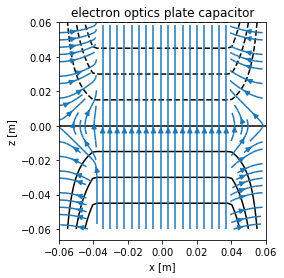

In [10]:
import matplotlib.pyplot as plt

# mesh grid definition for sampling
x = np.linspace(-0.6*l,0.6*l)
z = np.linspace(-0.6*l,0.6*l)
rx,rz = np.meshgrid(x,z)

plt.axes().set_aspect('equal')

# equipotential lines
plt.contour(rx,rz,phi(rx,rz), colors='k')

# field lines
plt.streamplot(rx,rz, E(rx,rz)[0], E(rx,rz)[1])

plt.title("electron optics plate capacitor")
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.show()

---
**Erste Hilfe Python:**
* Online-Sprechstunde jeden Montag und Freitag im Semester von 16-17 Uhr über BigBlueButton
* Studiengruppe im StudIP mit dem Titel “Erste Hilfe Python der SUB Göttingen”
* Übersichts-Pad ( https://pad.gwdg.de/ErsteHilfePython ) als alternative Anlaufstelle

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import electron_mass as me, elementary_charge as e

dU = 5.11e3 


def f(t,x):
    Fx = E(x[0], x[1])[0] * e
    Fz = E(x[0], x[1])[1] * e
    return[x[2], x[3], Fx/me, Fz/me]

rx0 = - 0.2
rz0 = 0
vx0 = np.sqrt(2*e*dU/me)
vz0 = 0
x0 = [rx0, rz0]
v0 = [vx0, vz0]

f(1, [x0 , v0])


TypeError: can only concatenate list (not "float") to list